# Data Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
matches = pd.read_pickle('../dataset/pickle/Matches.pkl')
matches.head()

,match_no,team_1,team_2,date,day,umpire_1,umpire_2,player_of_match,winner,city,venue
Match 01 (MI vs RCB),1,Mumbai Indians (MI),Royal Challengers Bangalore (RCB),2021-04-09,Friday,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai"
Match 02 (CSK vs DC),2,Chennai Super Kings (CSK),Delhi Capitals (DC),2021-04-10,Saturday,AK Chaudhary,VK Sharma,S Dhawan,Delhi Capitals,Mumbai,"Wankhede Stadium, Mumbai"
Match 03 (SRH vs KKR),3,Sunrisers Hyderabad (SRH),Kolkata Knight Riders (KKR),2021-04-11,Sunday,KN Ananthapadmanabhan,Nitin Menon,N Rana,Kolkata Knight Riders,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai"
Match 04 (RR vs PBKS),4,Rajasthan Royals (RR),Punjab Kings (PBKS),2021-04-12,Monday,AK Chaudhary,S Ravi,SV Samson,Punjab Kings,Mumbai,"Wankhede Stadium, Mumbai"
Match 05 (KKR vs MI),5,Kolkata Knight Riders (KKR),Mumbai Indians (MI),2021-04-13,Tuesday,C Shamshuddin,CB Gaffaney,RD Chahar,Mumbai Indians,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai"


In [64]:
matches.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Match 01 (MI vs RCB) to Match 60 (CSK vs KKR)
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   match_no         60 non-null     int8          
 1   team_1           60 non-null     category      
 2   team_2           60 non-null     category      
 3   date             60 non-null     datetime64[ns]
 4   day              60 non-null     object        
 5   umpire_1         60 non-null     category      
 6   umpire_2         60 non-null     category      
 7   player_of_match  60 non-null     object        
 8   winner           60 non-null     category      
 9   city             60 non-null     category      
 10  venue            60 non-null     category      
dtypes: category(7), datetime64[ns](1), int8(1), object(2)
memory usage: 18.0 KB


In [65]:
match = pd.read_pickle('../dataset/pickle/Match 01 (MI vs RCB) 2021-04-09pkl')
match.head()

,inning,batting_team,bowling_team,ball,non_striker,batsman,bowler,extra_runs,batsman_run,total_runs,extras,player_out,elimination_kind,fielders_caught
0,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.1,CA Lynn,RG Sharma,Mohammed Siraj,0,2,2,0,0,0,0
1,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.2,CA Lynn,RG Sharma,Mohammed Siraj,0,0,0,0,0,0,0
2,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.3,CA Lynn,RG Sharma,Mohammed Siraj,0,0,0,0,0,0,0
3,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.4,CA Lynn,RG Sharma,Mohammed Siraj,0,2,2,0,0,0,0
4,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.5,CA Lynn,RG Sharma,Mohammed Siraj,0,0,0,0,0,0,0


In [66]:
match = match.astype({'inning': 'object', 'batting_team': 'object', 'batsman': 'object'})

match.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   inning            250 non-null    object  
 1   batting_team      250 non-null    object  
 2   bowling_team      250 non-null    category
 3   ball              250 non-null    float32 
 4   non_striker       250 non-null    category
 5   batsman           250 non-null    object  
 6   bowler            250 non-null    category
 7   extra_runs        250 non-null    int8    
 8   batsman_run       250 non-null    int8    
 9   total_runs        250 non-null    int8    
 10  extras            250 non-null    object  
 11  player_out        250 non-null    object  
 12  elimination_kind  250 non-null    object  
 13  fielders_caught   250 non-null    object  
dtypes: category(3), float32(1), int8(3), object(7)
memory usage: 89.6 KB


In [67]:
match.groupby('batting_team').agg({'total_runs': 'sum'})

,total_runs
batting_team,
Mumbai Indians,159
Royal Challengers Bangalore,160


In [68]:
teams = match['batting_team'].unique()

teams

array(['Mumbai Indians', 'Royal Challengers Bangalore'], dtype=object)

In [73]:
match[match['batting_team'] == teams[0]].groupby(['inning', 'batsman']).agg({'batsman_run': 'sum'})

batsman_run
inning      batsman                  
1st innings CA Lynn                49
            HH Pandya              13
            Ishan Kishan           28
            JJ Bumrah               1
            KA Pollard              7
            KH Pandya               7
            M Jansen                0
            RG Sharma              19
            SA Yadav               31

In [74]:
match[match['batting_team'] == teams[1]].groupby(['inning', 'batsman']).agg({'batsman_run': 'sum'})

batsman_run
inning      batsman                       
2nd innings AB de Villiers              48
            DT Christian                 1
            GJ Maxwell                  39
            HV Patel                     4
            KA Jamieson                  4
            Mohammed Siraj               0
            RM Patidar                   8
            Shahbaz Ahmed                1
            V Kohli                     33
            Washington Sundar           10

In [70]:
match[match['batting_team'] == teams[0]]['batting_team'].value_counts()

Mumbai Indians    124
Name: batting_team, dtype: int64

In [81]:
match[match['batting_team'] == teams[0]].pivot_table(
    index=['batting_team', 'batsman'],
    values='batsman_run',
    aggfunc='sum',
    margins=True)

batsman_run
batting_team   batsman                  
Mumbai Indians CA Lynn              49.0
               HH Pandya            13.0
               Ishan Kishan         28.0
               JJ Bumrah             1.0
               KA Pollard            7.0
               KH Pandya             7.0
               M Jansen              0.0
               RG Sharma            19.0
               SA Yadav             31.0
All                                155.0

In [87]:
match.groupby('inning').agg({'batsman_run': 'sum', 'extra_runs': 'sum'})

,batsman_run,extra_runs
inning,,
1st innings,155,4
2nd innings,148,12


In [97]:
match.head(12)

,inning,batting_team,bowling_team,ball,non_striker,batsman,bowler,extra_runs,batsman_run,total_runs,extras,player_out,elimination_kind,fielders_caught
0,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.1,CA Lynn,RG Sharma,Mohammed Siraj,0,2,2,0,0,0,0
1,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.2,CA Lynn,RG Sharma,Mohammed Siraj,0,0,0,0,0,0,0
2,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.3,CA Lynn,RG Sharma,Mohammed Siraj,0,0,0,0,0,0,0
3,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.4,CA Lynn,RG Sharma,Mohammed Siraj,0,2,2,0,0,0,0
4,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.5,CA Lynn,RG Sharma,Mohammed Siraj,0,0,0,0,0,0,0
5,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.6,CA Lynn,RG Sharma,Mohammed Siraj,0,1,1,0,0,0,0
6,1st innings,Mumbai Indians,Royal Challengers Bangalore,1.1,CA Lynn,RG Sharma,KA Jamieson,0,1,1,0,0,0,0
7,1st innings,Mumbai Indians,Royal Challengers Bangalore,1.2,RG Sharma,CA Lynn,KA Jamieson,0,0,0,0,0,0,0
8,1st innings,Mumbai Indians,Royal Challengers Bangalore,1.3,RG Sharma,CA Lynn,KA Jamieson,0,0,0,0,0,0,0
9,1st innings,Mumbai Indians,Royal Challengers Bangalore,1.4,RG Sharma,CA Lynn,KA Jamieson,0,0,0,0,0,0,0


In [100]:
match[match['batting_team'] == teams[0]].groupby(pd.cut(match['ball'], np.arange(21)))[['total_runs']].sum()

,total_runs
ball,
"(0, 1]",5
"(1, 2]",1
"(2, 3]",6
"(3, 4]",12
"(4, 5]",6
"(5, 6]",11
"(6, 7]",14
"(7, 8]",15
"(8, 9]",13


In [101]:
df = pd.DataFrame({'case_type':['Service']*20+['chargeback']*9,'claim_type':['service']*5+['local_charges']*5+['service_not_used']*5+['supplier_service']*5+['service']*8+['local_charges']})

df

,case_type,claim_type
0,Service,service
1,Service,service
2,Service,service
3,Service,service
4,Service,service
5,Service,local_charges
6,Service,local_charges
7,Service,local_charges
8,Service,local_charges
9,Service,local_charges


In [103]:
df_out = df.groupby(by=["case_type", "claim_type"])["case_type"].count()

df_out

case_type   claim_type      
Service     local_charges       5
            service             5
            service_not_used    5
            supplier_service    5
chargeback  local_charges       1
            service             8
Name: case_type, dtype: int64

In [114]:
df1 = df_out.to_frame()
df1

case_type
case_type  claim_type                 
Service    local_charges             5
           service                   5
           service_not_used          5
           supplier_service          5
chargeback local_charges             1
           service                   8

In [116]:
df2 = df_out.groupby('case_type').sum().to_frame().assign(claim_type= "total").set_index('claim_type', append=True)
df2

,,case_type
case_type,claim_type,
Service,total,20
chargeback,total,9


In [119]:
pd.concat([df1, df2]).sort_index()

case_type
case_type  claim_type                 
Service    local_charges             5
           service                   5
           service_not_used          5
           supplier_service          5
           total                    20
chargeback local_charges             1
           service                   8
           total                     9

In [122]:
ing1 = match.groupby(
    ['inning', pd.cut(match['ball'], np.arange(21))]
)[['total_runs']].sum()
ing1

total_runs
inning      ball                
1st innings (0, 1]             5
            (1, 2]             1
            (2, 3]             6
            (3, 4]            12
            (4, 5]             6
            (5, 6]            11
            (6, 7]            14
            (7, 8]            15
            (8, 9]            13
            (9, 10]            3
            (10, 11]           8
            (11, 12]           4
            (12, 13]           7
            (13, 14]          15
            (14, 15]           8
            (15, 16]           7
            (16, 17]           7
            (17, 18]           4
            (18, 19]          12
            (19, 20]           1
2nd innings (0, 1]            10
            (1, 2]             5
            (2, 3]             6
            (3, 4]            14
            (4, 5]             6
            (5, 6]             5
            (6, 7]             4
            (7, 8]            13
            (8, 9]             6
            (9, 10]            6
            (10, 11]           9
            (11, 12]          11
            (12, 13]           4
            (13, 14]           4
            (14, 15]           3
            (15, 16]          15
            (16, 17]           5
            (17, 18]          15
            (18, 19]          12
            (19, 20]           7

In [126]:
ing2 = ing1.groupby('inning')['total_runs'].sum()
ing2.to_frame()

,total_runs
inning,
1st innings,159
2nd innings,160


In [130]:
ing3 = ing2.to_frame().assign(ball='total').set_index('ball', append=True)
ing3

,,total_runs
inning,ball,
1st innings,total,159
2nd innings,total,160


In [134]:
ing = pd.concat([ing1, ing3]).sort_index()
ing

total_runs
inning      ball                
1st innings (0, 1]             5
            (1, 2]             1
            (2, 3]             6
            (3, 4]            12
            (4, 5]             6
            (5, 6]            11
            (6, 7]            14
            (7, 8]            15
            (8, 9]            13
            (9, 10]            3
            (10, 11]           8
            (11, 12]           4
            (12, 13]           7
            (13, 14]          15
            (14, 15]           8
            (15, 16]           7
            (16, 17]           7
            (17, 18]           4
            (18, 19]          12
            (19, 20]           1
            total            159
2nd innings (0, 1]            10
            (1, 2]             5
            (2, 3]             6
            (3, 4]            14
            (4, 5]             6
            (5, 6]             5
            (6, 7]             4
            (7, 8]            13
            (8, 9]             6
            (9, 10]            6
            (10, 11]           9
            (11, 12]          11
            (12, 13]           4
            (13, 14]           4
            (14, 15]           3
            (15, 16]          15
            (16, 17]           5
            (17, 18]          15
            (18, 19]          12
            (19, 20]           7
            total            160

In [187]:
overs = match[match['batting_team'] == teams[0]].groupby(
    pd.cut(match['ball'], np.arange(21))
)[['total_runs']].sum().merge(
    match[match['batting_team'] == teams[1]].groupby(
        pd.cut(match['ball'], np.arange(21))
    )[['total_runs']].sum(),
    how='inner',
    left_on='ball',
    right_on='ball')

overs.index.names = ['Over']
overs.columns = [teams[0], teams[1]]

overs.index.astype('str')

overs

,Mumbai Indians,Royal Challengers Bangalore
Over,,
"(0, 1]",5,10
"(1, 2]",1,5
"(2, 3]",6,6
"(3, 4]",12,14
"(4, 5]",6,6
"(5, 6]",11,5
"(6, 7]",14,4
"(7, 8]",15,13
"(8, 9]",13,6


<BarContainer object of 20 artists>

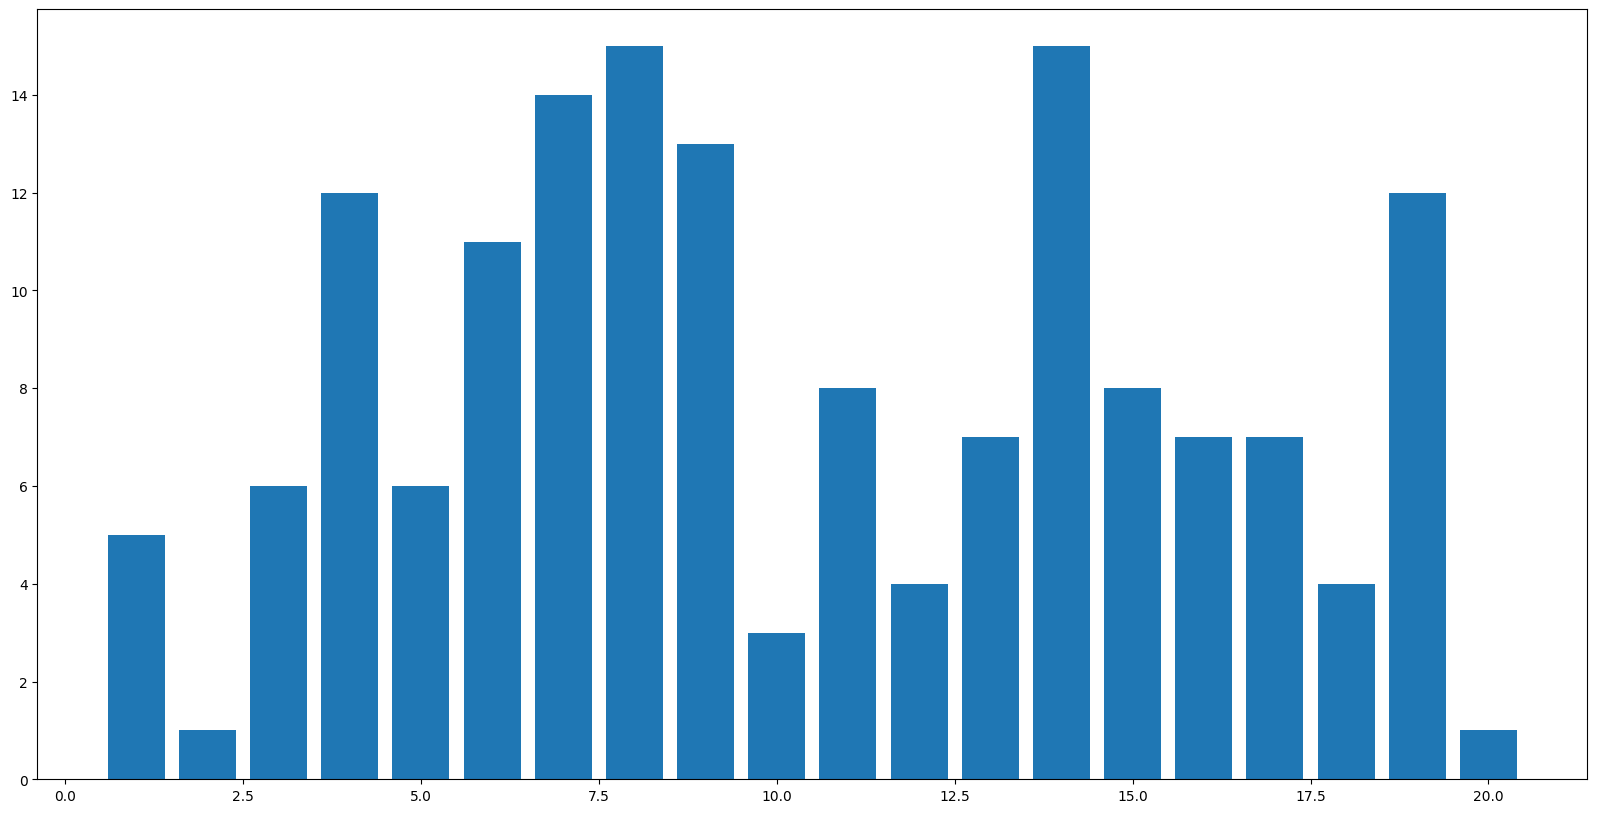

In [199]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.bar(x=np.arange(1, 21), height=overs['Mumbai Indians'])

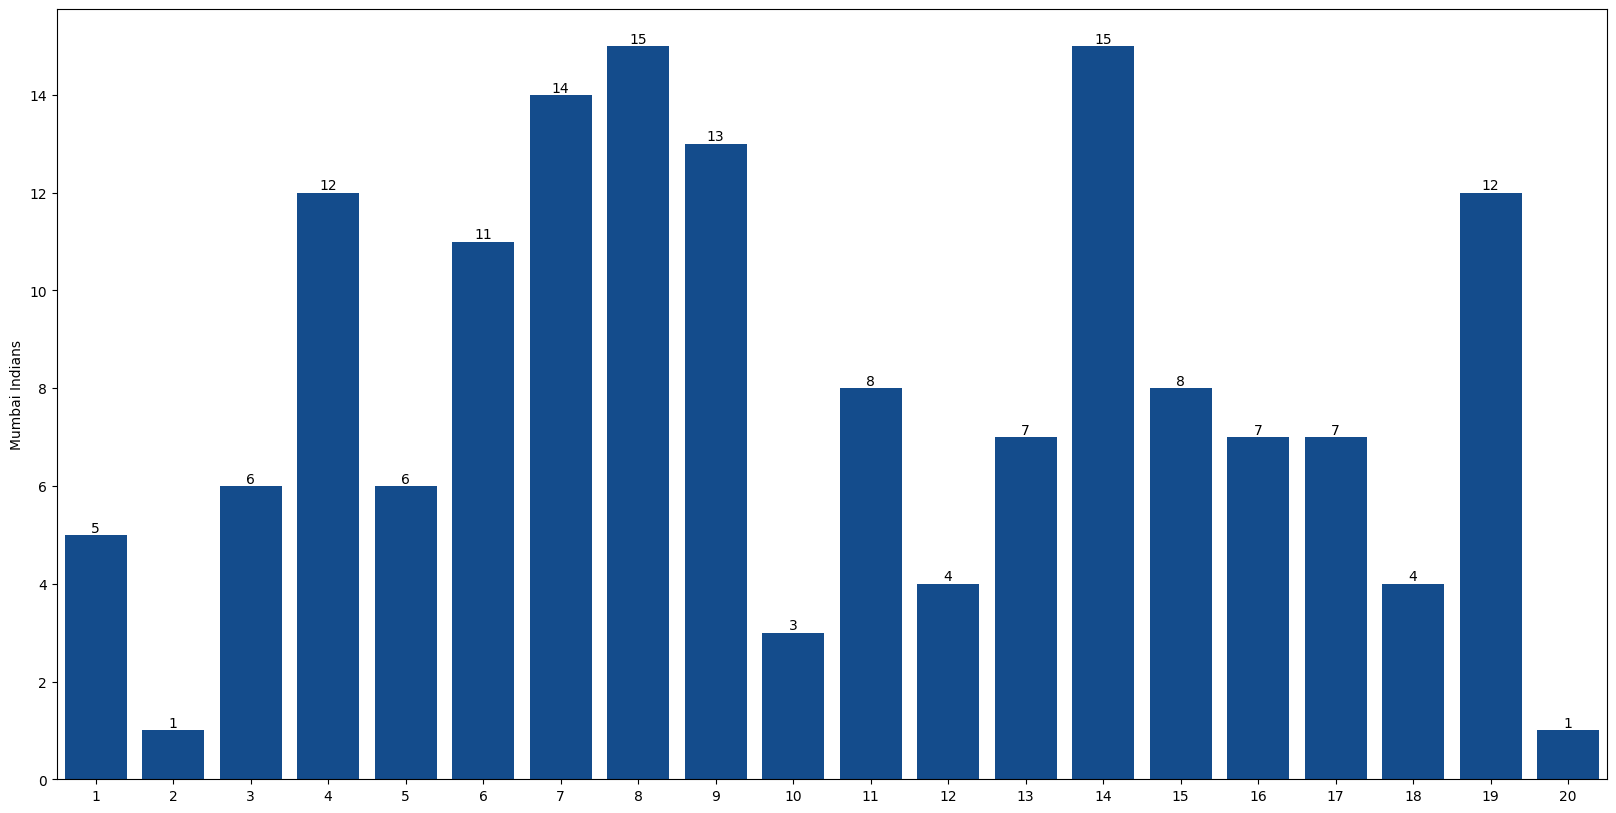

In [211]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(
    x=np.arange(1, 21),
    y=overs['Mumbai Indians'],
    color='#004ba0',
)

for i in ax.containers:
    ax.bar_label(i)

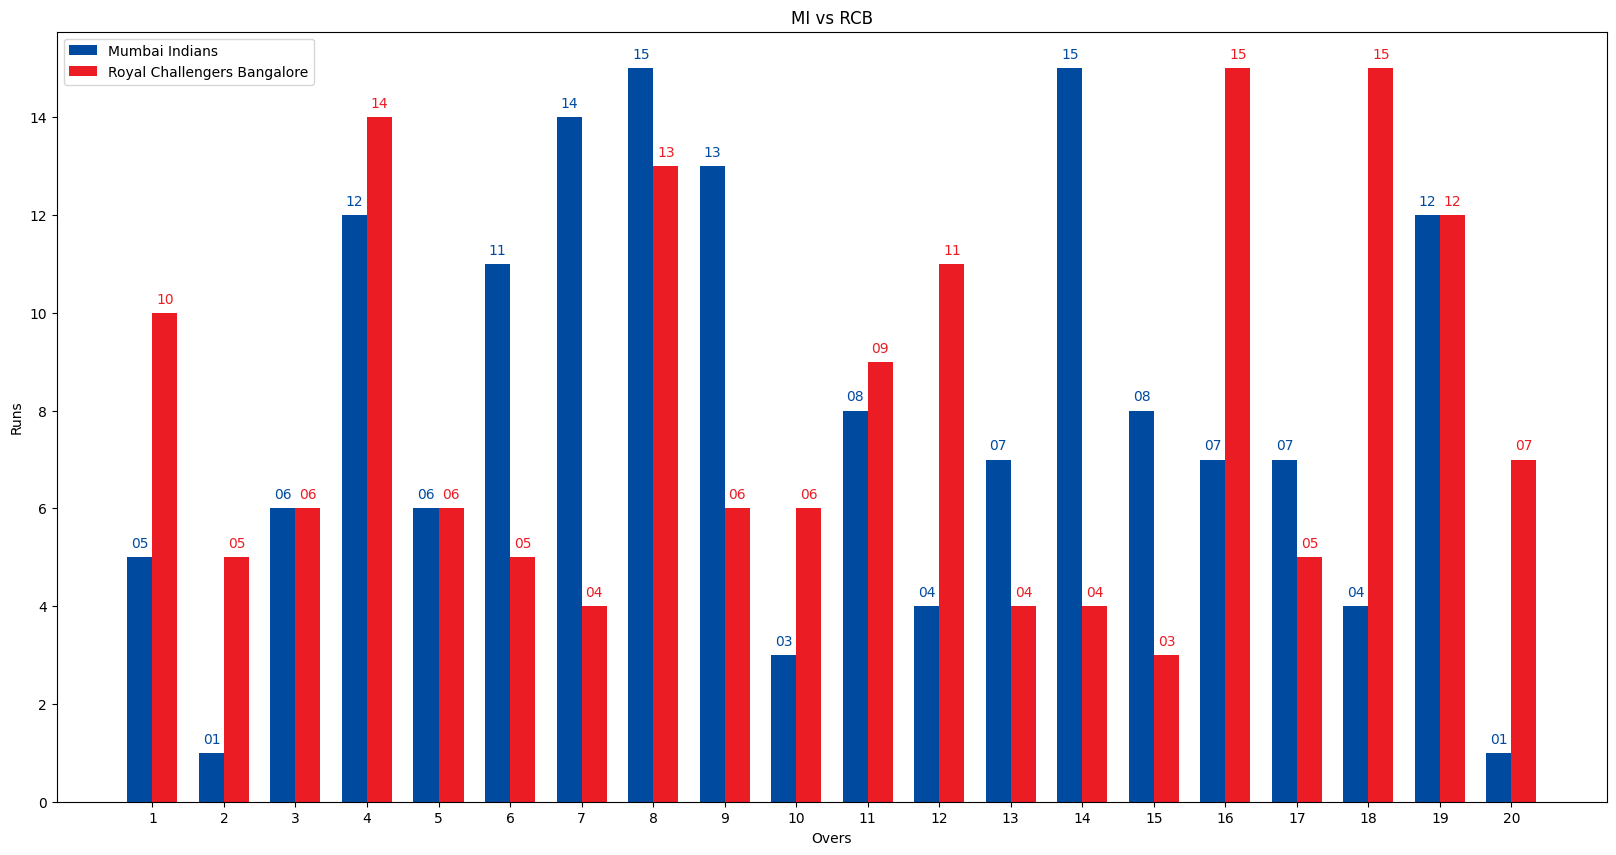

In [236]:
fig, ax = plt.subplots(figsize=(20, 10))

width = .35
x = np.arange(1, 21)

ax.bar(
    x - width / 2,
    overs['Mumbai Indians'],
    width=width,
    color='#004ba0',
    label='Mumbai Indians'
)

ax.bar(
    x + width / 2,
    overs['Royal Challengers Bangalore'],
    width=width,
    color='#ec1c24',
    label='Royal Challengers Bangalore'
)

ax.set_title('MI vs RCB')
ax.set_xlabel('Overs')
ax.set_ylabel('Runs')
ax.set_xticks(x)
# ax.set_xticklabels(overs.index)

for i, v in enumerate(overs['Mumbai Indians']):
    ax.text((i+.88) - width / 2, v+.2, str('%.2d'%v), color='#004ba0')
for i, v in enumerate(overs['Royal Challengers Bangalore']):
    ax.text((i+.88) + width / 2, v+.2, str('%.2d'%v), color='#ec1c24')
#     print((i+1) - width / 2, v)

ax.legend()

plt.show()